In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

path = 'D:/moham/Uni Work/Year 3/Semester 1/Intro to AI/Coursework' 

filename_read = os.path.join(path, "weatherAUS.csv")
df = pd.read_csv(filename_read, na_values=['NaN', '?'])

print(df[:5])

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8

In [2]:
print(df.isnull().any())

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM          False
RainTomorrow     False
dtype: bool


In [3]:
df.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [4]:
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)
df.shape

(142193, 17)

In [5]:
df = df.dropna(how='any')
df.shape

(112925, 17)

In [6]:
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]
(107868, 17)


In [7]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

df.iloc[4:9]

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
5,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0
6,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0
7,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0
8,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1


In [8]:
df = df.select_dtypes(include=['float', 'float'])
print(df[:5]) 

result = []
for x in df.columns:
    if x != 'Temp3pm':
        result.append(x)
   
X = df[result].values
y = df['Temp3pm'].values

   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  
0         71.0         22.0       1007.7       1007.1     16.9     21.8  
1         44.0         25.0       1010.6       1007.8     17.2     24.3  
2         38.0         30.0       1007.6       1008.7     21.0     23.2  
3         45.0         16.0       1017.6       1012.8     18.1     26.5  
4         82.0         33.0       1010.8       1006.0     17.8     29.7  


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = LinearRegression()  
model.fit(X_train, y_train)

print(model.coef_)

[ 0.04866742  0.75524079  0.01668841 -0.01527637  0.00963067 -0.00298676
  0.03489427 -0.06312074  0.15983135 -0.14853874  0.15526508]


In [10]:
y_pred = model.predict(X_test)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare.head(25)
print(df_head)

    Actual  Predicted
0     21.5  22.796148
1     15.2  16.486179
2     17.9  17.313485
3     16.6  16.141837
4     31.2  30.172906
5     24.4  24.823469
6     21.3  21.966788
7     25.4  24.499125
8     19.9  20.815065
9     13.8  17.062928
10    22.5  22.635577
11    25.1  24.837774
12    24.3  24.099766
13    16.0  15.305648
14    32.6  31.306572
15    21.2  21.220222
16    18.7  18.196823
17    20.2  20.737753
18    13.0  13.906182
19    22.3  22.003004
20    13.0  12.554655
21    39.5  39.019876
22    19.9  18.165973
23    20.0  18.672495
24    28.2  28.466742


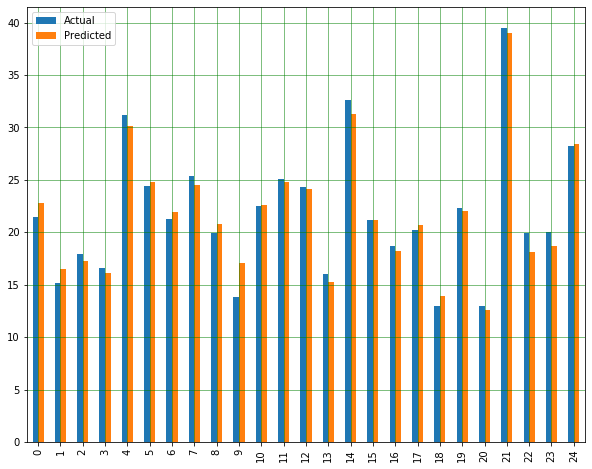

Mean: 22.18022768568992
Root Mean Squared Error: 0.9149477296982583


In [11]:
df_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

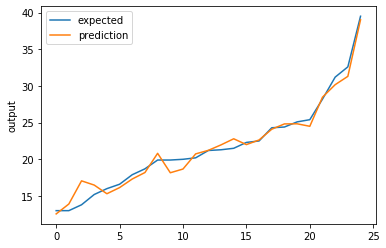

In [12]:
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
chart_regression(y_pred[:25].flatten(),y_test[:25],sort=True)   